# Save Wally!

This project Aims at identifying small objects from a large image knowing their coordinates
There are 8(?) classes of objects (seals)

In [2]:
import numpy as np
maxX = 46883
maxY = 63512
SizeTile = 256
# coordinate vector full resolution
Xo = np.arange(maxX)
Yo = np.arange(maxY)
# LL coordinate of tiles
Xto = Xo[::SizeTile]
Yto = Yo[::SizeTile]

def LocateTile (X,Y,SizeTile):
    '''Locate the tile index from the pixel coordinate'''
    return X//SizeTile, Y//SizeTile

def axisTile (Coord, depth):
    '''Locate pixel coordinate from coordinate vector at given depth'''
    return Coord[::2*depth]

def find_nearest(array, value):
    return (np.abs(array - value)).argmin()


DummyX, DummyY = 1001, 5679
k=5
print(find_nearest(axisTile(Xo,k), DummyX), find_nearest(axisTile(Yo, k), DummyY))

100 568


In [8]:
r 

array([    1,     3,     5, ..., 46877, 46879, 46881])

## Choosing your method
![Title](https://scikit-learn.org/stable/_static/ml_map.png)

### Scenario 0
Start => >50 samples => Predicting a category => labelel data 
#### Scenario 1
=> <100k samples => LinearSVC
##### Scenario 1.1 
Not working => Kneighbors classifier
###### Scenario 1.1.1 
Not working => SVC Ensemble classifier
#### Scenario 2
=> >100k samples => SGD Classifier
###### Scenario 2.1
Not Working => kernel approximation
## Tutorial Application: A Face Detection Pipeline
https://jakevdp.github.io/PythonDataScienceHandbook/05.14-image-features.html
First vectorise the image for feature detection, The HOG method from Skimage

/home/julien/hackathon/local/lib/python3.5/site-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


[0.02221787 0.01265379 0.02363059 ... 0.0086126  0.0138163  0.00948539]


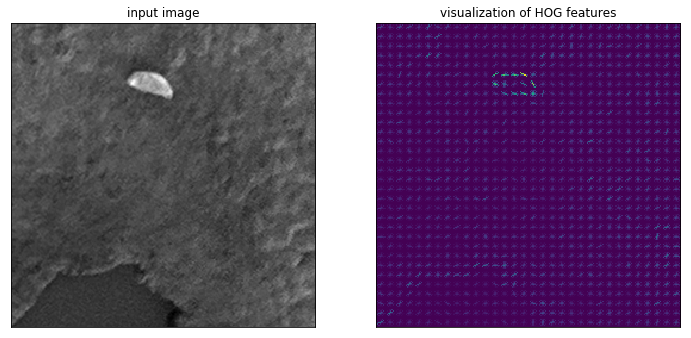

In [26]:
from skimage import data, color, feature
from PIL import Image
import matplotlib.pyplot as plt
def RGB2Lum(patch):
    '''Convert a rgb array to grey using standard luminence equation'''   
    return patch[:,:,0]*.2126 + patch[:,:,1]*.7152 + patch[:,:,2]*.0722

ax = np.arange(256*256*4).reshape(256,256,4)
path = '/home/julien/Desktop/NewData/StitchMICE_ORKlh16_3_1104_CP_FINAL/'+'8/130/87.png'
Im = Image.open(path)

#Image = 'some array'
Grey_patch = RGB2Lum(np.asarray(Im))
hog_vec, hog_vis = feature.hog(Grey_patch, visualize=True)

fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(Grey_patch, cmap='gray')
ax[0].set_title('input image')

ax[1].imshow(hog_vis)
ax[1].set_title('visualization of HOG features')
print(hog_vec)

In [51]:
2**np.arange(9)

array([  1,   2,   4,   8,  16,  32,  64, 128, 256])